In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import seaborn as sns

/Users/wafic/anaconda/envs/py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
output_notebook()

Loading BokehJS ...

## Analysis

In [3]:
df = pd.read_csv('prosperLoanData.csv')

#### This data set contains 113,937 loans with 81 variables on each loan.

In [4]:
df.shape

(113937, 81)

#### Here are the names of all the 81 variables:

In [5]:
df.columns

Index([u'ListingKey', u'ListingNumber', u'ListingCreationDate', u'CreditGrade',
       u'Term', u'LoanStatus', u'ClosedDate', u'BorrowerAPR', u'BorrowerRate',
       u'LenderYield', u'EstimatedEffectiveYield', u'EstimatedLoss',
       u'EstimatedReturn', u'ProsperRating (numeric)',
       u'ProsperRating (Alpha)', u'ProsperScore', u'ListingCategory (numeric)',
       u'BorrowerState', u'Occupation', u'EmploymentStatus',
       u'EmploymentStatusDuration', u'IsBorrowerHomeowner',
       u'CurrentlyInGroup', u'GroupKey', u'DateCreditPulled',
       u'CreditScoreRangeLower', u'CreditScoreRangeUpper',
       u'FirstRecordedCreditLine', u'CurrentCreditLines', u'OpenCreditLines',
       u'TotalCreditLinespast7years', u'OpenRevolvingAccounts',
       u'OpenRevolvingMonthlyPayment', u'InquiriesLast6Months',
       u'TotalInquiries', u'CurrentDelinquencies', u'AmountDelinquent',
       u'DelinquenciesLast7Years', u'PublicRecordsLast10Years',
       u'PublicRecordsLast12Months', u'RevolvingCredi

#### Lets take a glimpse of all the variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
df = df.rename(columns={'ProsperRating (Alpha)':'ProsperRating'})

## Exploratory Univariate Analysis

#### There’s a borrower behind every loan, I’ll start with exploring some variables of the characteristics of the borrowers.

/Users/wafic/anaconda/envs/py2/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


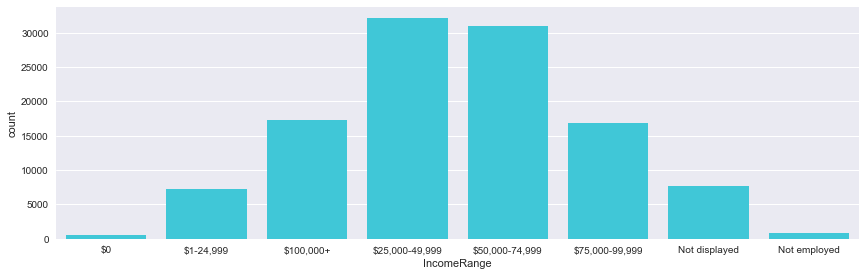

In [8]:
SORT=sorted(df.IncomeRange.unique())
sns.set(style="darkgrid")
sns.factorplot(x="IncomeRange",  data=df, kind="count", size=4,aspect=3,margin_titles=True, color="#27DBF0",\
             order=SORT)

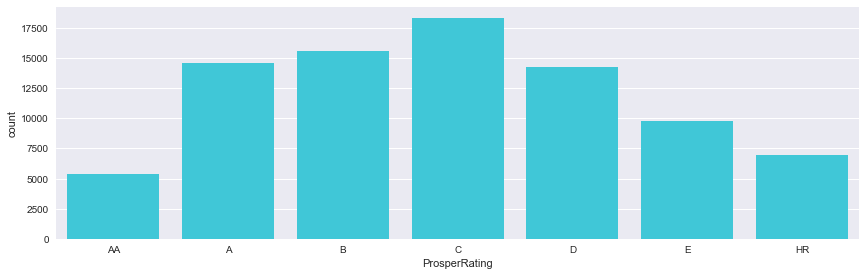

In [96]:
SORT=['AA','A','B', 'C', 'D', 'E', 'HR']
sns.factorplot(x="ProsperRating",  data=df, kind="count", size=4,aspect=3,margin_titles=True, color="#27DBF0",\
              order=SORT)

In [ ]:
# Conver Emploment duration from months to years
df.EmploymentStatusDuration = df.EmploymentStatusDuration.astype(float)
df.EmploymentStatusDuration = df.EmploymentStatusDuration/12
# df.EmploymentStatusDuration = df.EmploymentStatusDuration.round(1)

In [ ]:
plt.figure(figsize=(12, 8))
ax=df.EmploymentStatusDuration.hist(bins=70, color='#27DBF0',histtype='bar', ec='black')
plt.title('Lenght of Employment', fontsize=20)
ax.set_xlabel('Year of Employment', fontsize=15)
ax.set_ylabel('Number of Loans')

In [ ]:
df.DebtToIncomeRatio.describe()

In [ ]:
plt.figure(figsize=(12, 8))
x = df[df.DebtToIncomeRatio<=11].DebtToIncomeRatio
n, bins, patches= plt.hist(x, 50, color='#27DBF0',histtype='bar', ec='black')
plt.xlabel('Debt to Income Ratio', fontsize=15)
plt.ylabel('Frequency')
plt.title('Debt to Income Ratio')

In [ ]:
plt.figure(figsize=(12, 8))
x = df[df.DebtToIncomeRatio<=1].DebtToIncomeRatio
n, bins, patches = plt.hist(x, 50, color='#27DBF0',histtype='bar', ec='black')
plt.setp(patches[30:], 'facecolor', 'g')
plt.xlabel('Debt to Income Ratio', fontsize=15)
plt.ylabel('Frequency')
plt.title('DTI less than 1')

#### Let’s see what people borrow money for

In [ ]:
df = df.rename(columns={'ListingCategory (numeric)':'Category'})

In [ ]:
sns.factorplot(data=df, x='Category', kind="count", size=4,aspect=3,margin_titles=True, color="#27DBF0")

In [ ]:
plt.figure(figsize=(12, 8))
x=df.Recommendations
n, bins, patches = plt.hist(x, 50, color='#27DBF0',histtype='bar', ec='black')
# plt.setp(patches[30:], 'facecolor', 'g')
plt.xlabel('Recommendations', fontsize=15)
plt.ylabel('Frequency')
plt.title('Number of Recommendations of Borrowers')

#### Number of loans with more then 1 recommendation

In [ ]:
(df.Recommendations >=1).value_counts()

In [10]:
df.LenderYield.describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

Text(0.5,1,u'Lenders Yield on Loans')

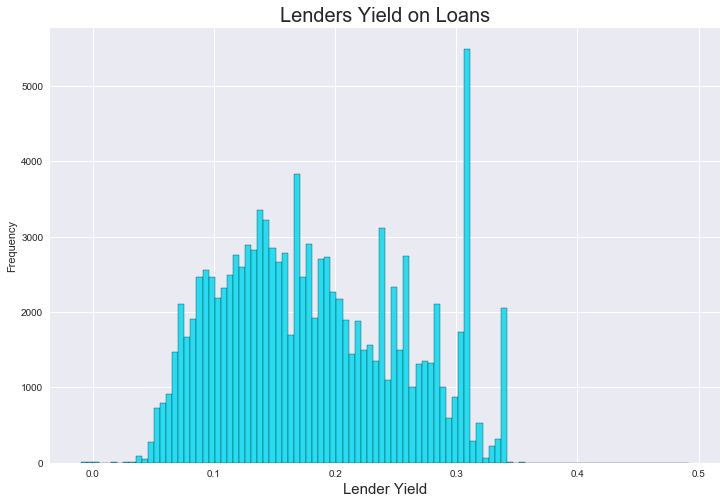

In [11]:
plt.figure(figsize=(12, 8))
x=df.LenderYield
n, bins, patches = plt.hist(x, 100, color='#27DBF0',histtype='bar', ec='black')
# plt.setp(patches[30:], 'facecolor', 'g')
plt.xlabel('Lender Yield', fontsize=15)
plt.ylabel('Frequency')
plt.title('Lenders Yield on Loans', fontsize=20)

In [12]:
#### Lenders with one investor

In [13]:
(df.Investors >1).value_counts()

True     86123
False    27814
Name: Investors, dtype: int64

Text(0.5,1,u'The Number of Investors Funded the Loans')

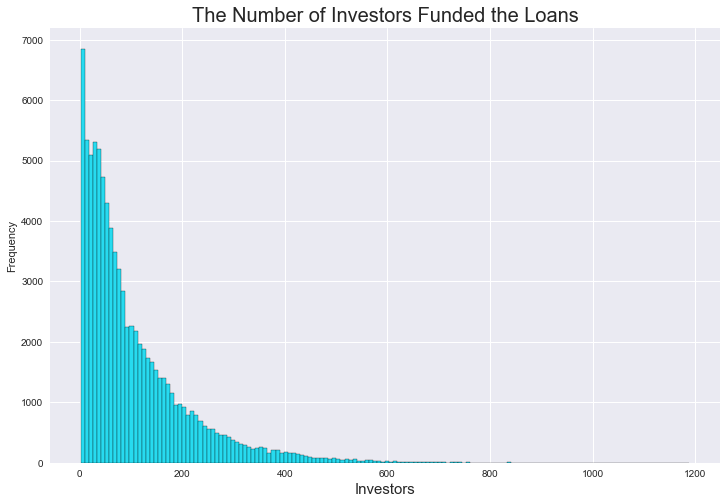

In [14]:
plt.figure(figsize=(12, 8))
x=df[df.Investors > 1].Investors
n, bins, patches = plt.hist(x, 150, color='#27DBF0',histtype='bar', ec='black')
plt.xlabel('Investors', fontsize=15)
plt.ylabel('Frequency')
plt.title('The Number of Investors Funded the Loans', fontsize=20)

In [15]:
df.groupby('BorrowerState').BorrowerState.count().sort_values(ascending=False).to_frame('Number of Borrowers').reset_index()

,BorrowerState,Number of Borrowers
0,CA,14717
1,TX,6842
2,NY,6729
3,FL,6720
4,IL,5921
5,GA,5008
6,OH,4197
7,MI,3593
8,VA,3278
9,NJ,3097


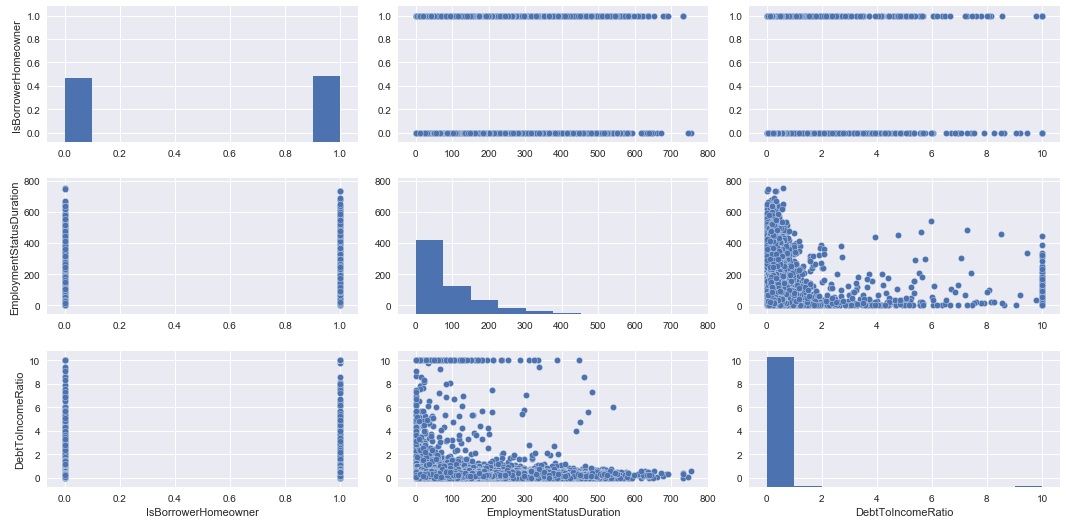

In [17]:
df1 = df[['IncomeRange', 'IsBorrowerHomeowner','EmploymentStatusDuration', 'DebtToIncomeRatio']].fillna(0)
g = sns.PairGrid(df1, size=2.5, aspect=2)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, edgecolor="w", s=40)

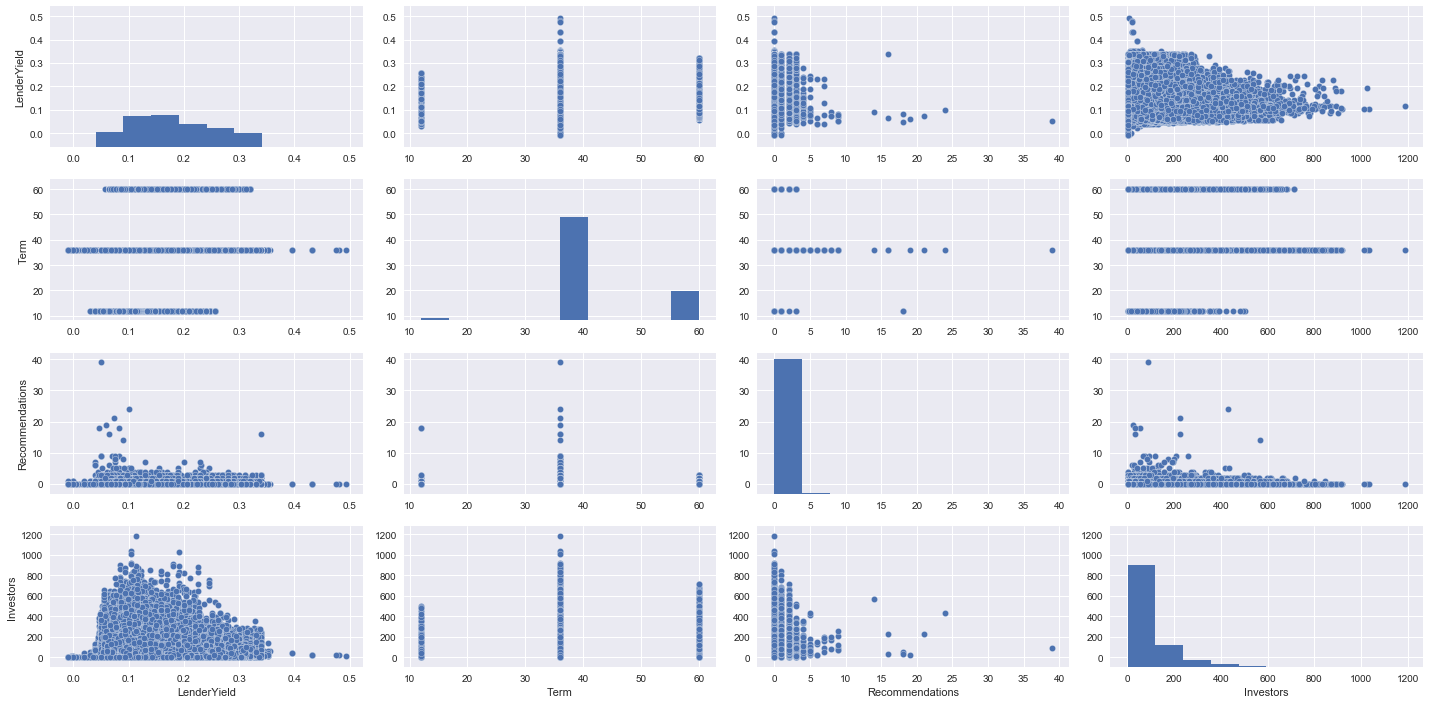

In [19]:
df2 = df[['LenderYield','ProsperRating', 'Term', 'Recommendations', 'Investors']].fillna(0)
g = sns.PairGrid(df2, size=2.5, aspect=2)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, edgecolor="w", s=40)

Text(0.5,1,u'Correlation between features')

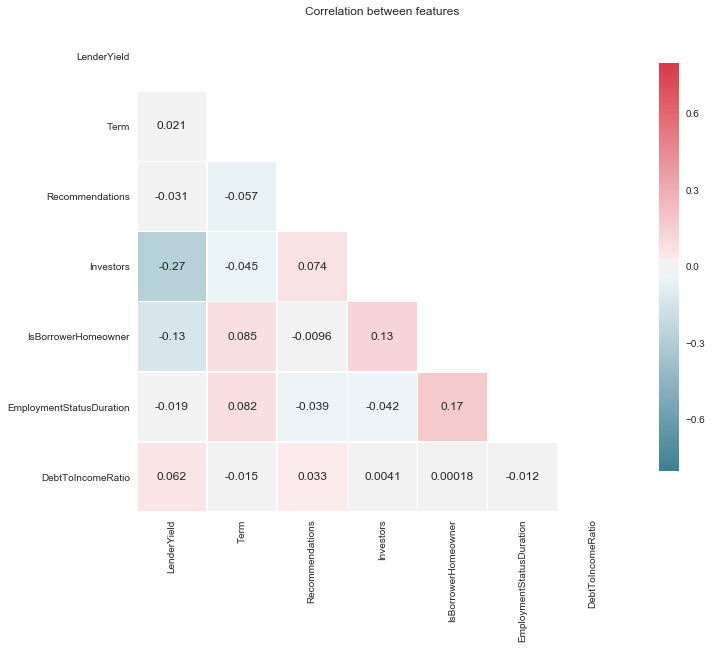

In [20]:
df3= df[['LenderYield','ProsperRating', 'Term', 'Recommendations', 'Investors','IncomeRange', \
       'IsBorrowerHomeowner','EmploymentStatusDuration', 'DebtToIncomeRatio']]

corr = df3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(11, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between features')

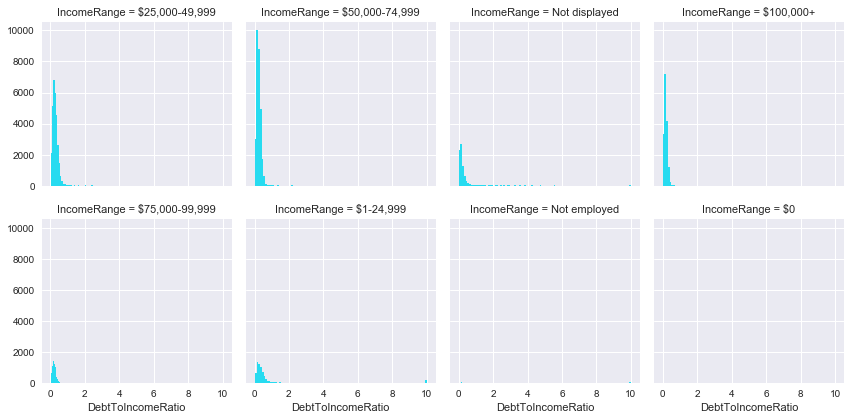

In [21]:
sns.set(style="darkgrid")
g = sns.FacetGrid(df, col="IncomeRange", col_wrap=4)
g.map(plt.hist,"DebtToIncomeRatio", color='#27DBF0',histtype='stepfilled', bins=100)
# g.map(sns.distplot, "DebtToIncomeRatio")

/Users/wafic/anaconda/envs/py2/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


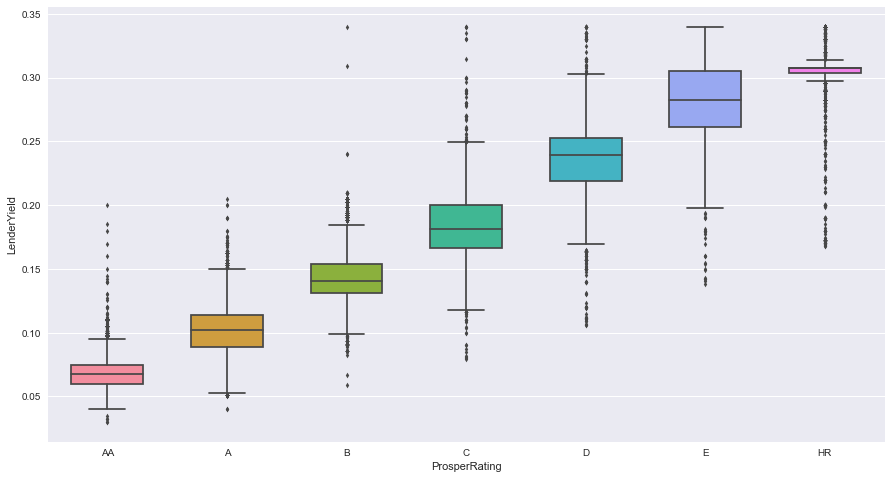

In [22]:
a4_dims = (15,8)
fig, ax = plt.subplots(figsize=a4_dims)
SORT=['AA','A','B', 'C', 'D', 'E', 'HR']
sns.boxplot(ax=ax, x='ProsperRating', y='LenderYield',data=df,\
            order=SORT, fliersize=4, width=0.6,saturation=0.9)

In [23]:
df.groupby('ProsperRating').LenderYield.describe()

,count,mean,std,min,25%,50%,75%,max
ProsperRating,,,,,,,,
A,14551.0,0.102933,0.017288,0.0398,0.0890,0.1019,0.1139,0.205
AA,5372.0,0.069111,0.014771,0.0300,0.0599,0.0679,0.0745,0.200
B,15581.0,0.144449,0.019879,0.0593,0.1314,0.1409,0.1539,0.340
C,18345.0,0.184427,0.024198,0.0795,0.1665,0.1814,0.1999,0.340
D,14274.0,0.236414,0.025371,0.1057,0.2187,0.2392,0.2525,0.340
E,9795.0,0.283335,0.026033,0.1379,0.2612,0.2825,0.3049,0.340
HR,6935.0,0.307318,0.018877,0.1679,0.3034,0.3077,0.3077,0.340


In [24]:
df.FirstRecordedCreditLine = pd.to_datetime(df.FirstRecordedCreditLine)

In [25]:
maxis = df.FirstRecordedCreditLine.max()

In [26]:
df['dates'] = (maxis - df.FirstRecordedCreditLine)/ np.timedelta64(1, 'Y')

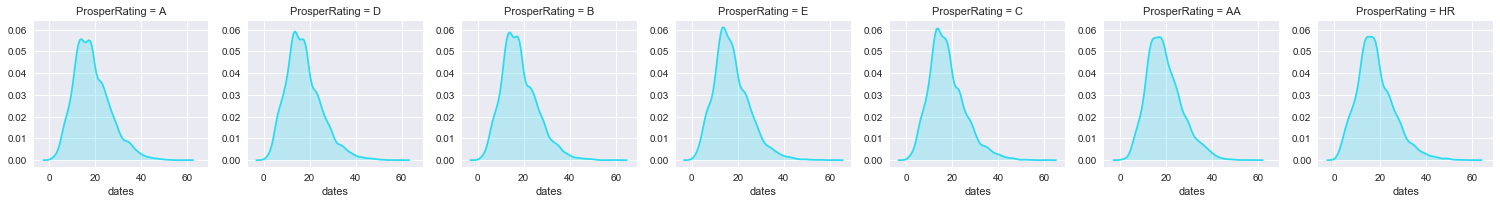

In [27]:
g = sns.FacetGrid(df, col="ProsperRating")
g.map(sns.distplot, "dates", hist=False, color='#27DBF0', kde_kws={"shade": True})

In [60]:
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

In [66]:
df['list_year'] = df.ListingCreationDate.dt.year

In [78]:
df_new =df.groupby(('BorrowerState','list_year')).ListingCreationDate.count().to_frame().reset_index()

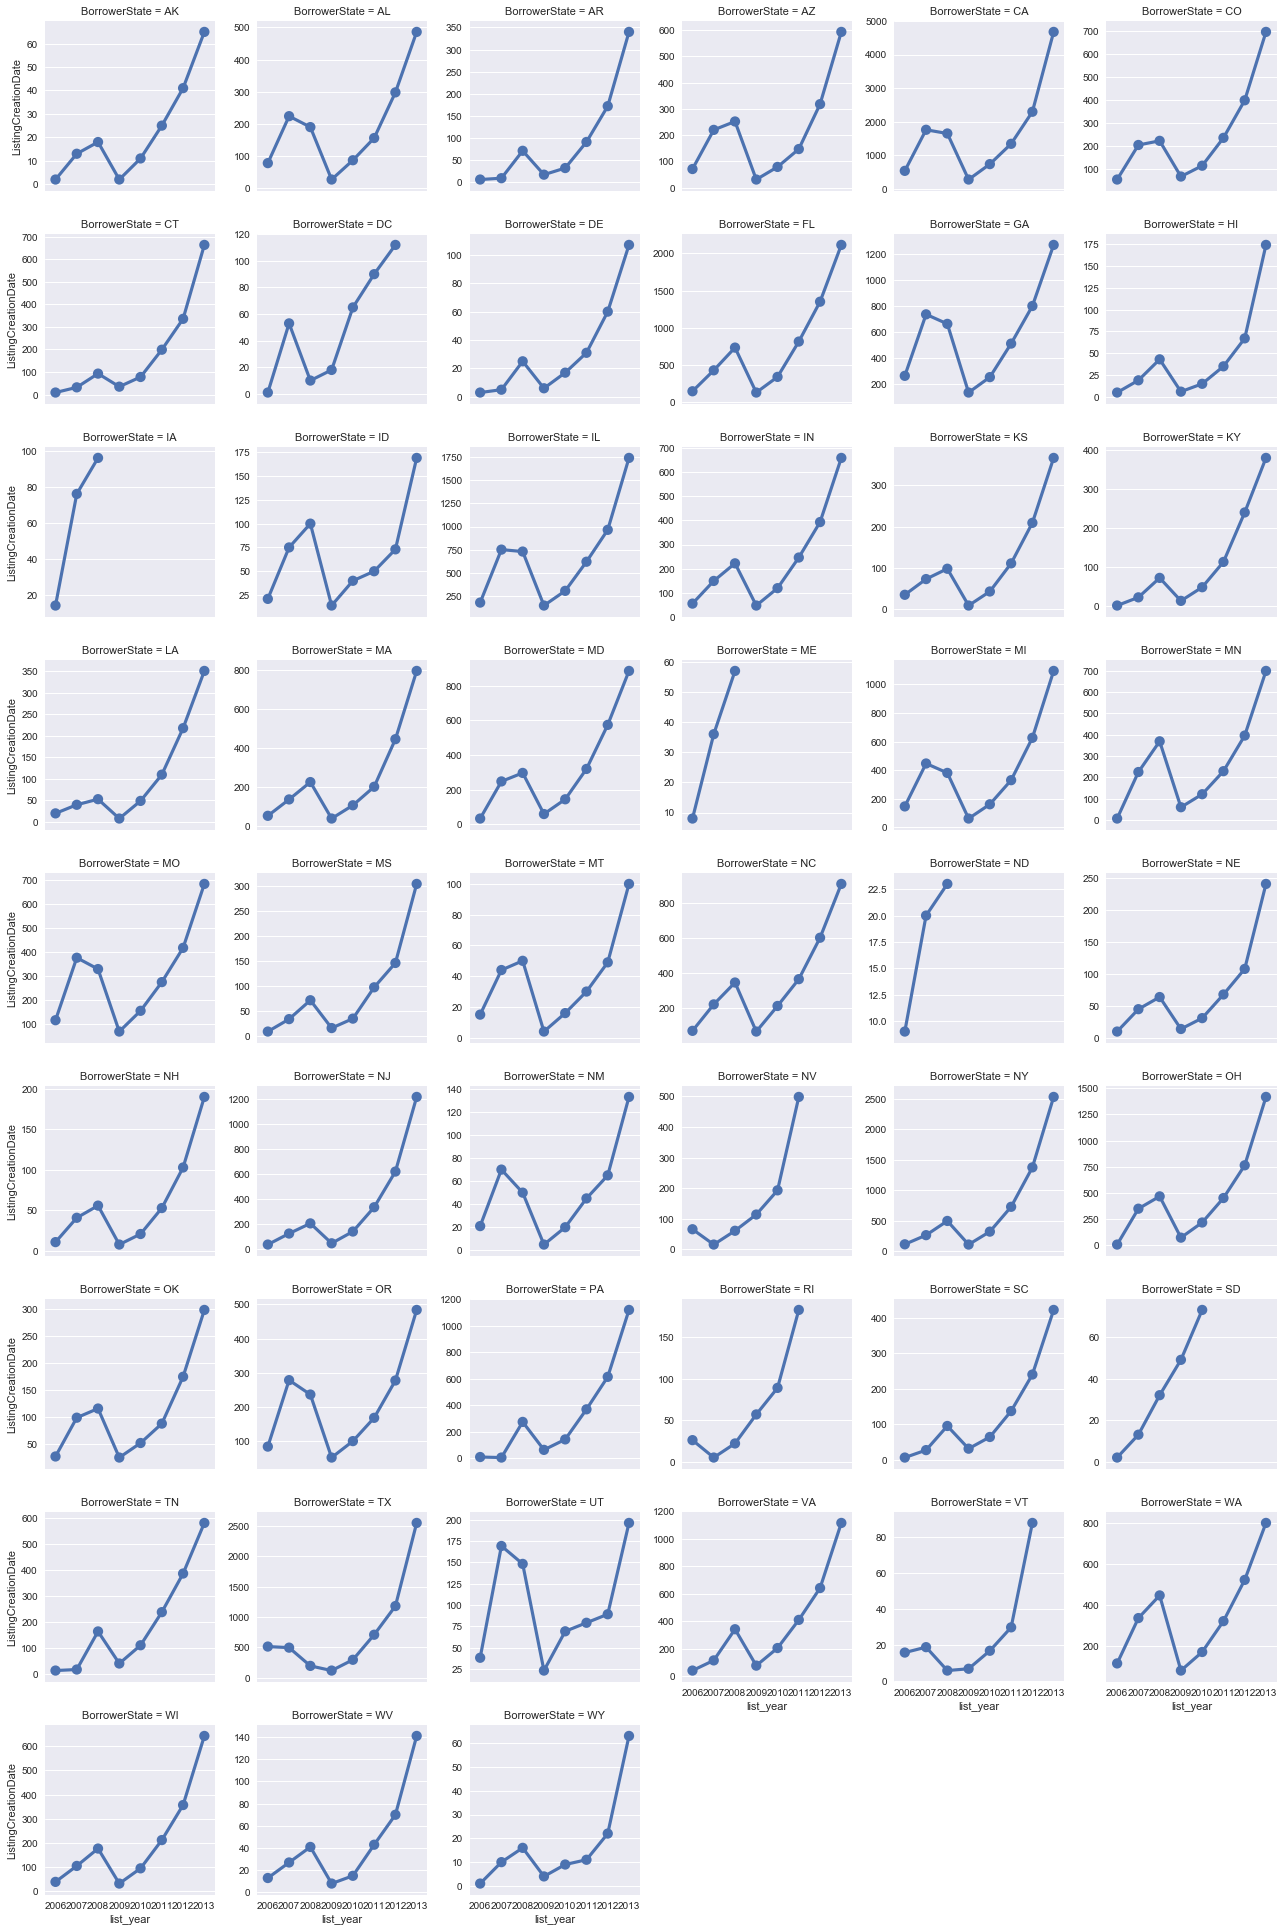

In [93]:
g = sns.FacetGrid(df_new[df_new.list_year<2014], col_wrap=6, col="BorrowerState", sharey=False)
g.map(sns.pointplot, 'list_year', 'ListingCreationDate')

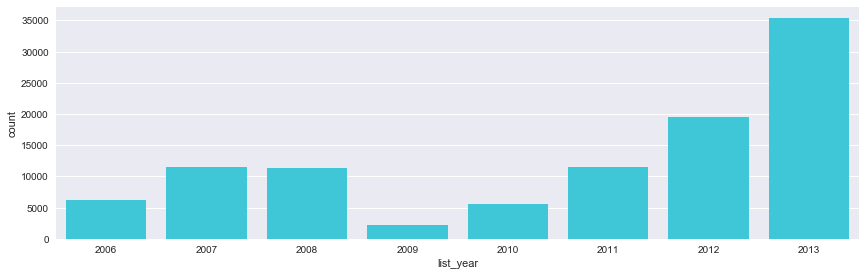

In [104]:
sns.factorplot(x="list_year",  data=df[(df.list_year<2014)&(df.list_year>2005)], kind="count", size=4, aspect=3,\
               margin_titles=True, color="#27DBF0")

In [110]:
df.groupby('BorrowerState').StatedMonthlyIncome.mean().sort_values(ascending=False).to_frame()

,StatedMonthlyIncome
BorrowerState,
CT,7394.696886
DC,6822.251963
NJ,6807.019966
MD,6516.032081
VA,6508.574309
NY,6225.880901
HI,6221.879788
MA,6190.189526
CA,6184.829239


In [ ]:

g.map(plt.hist,"DebtToIncomeRatio", color='#27DBF0',histtype='stepfilled', bins=100)

AttributeError: 'function' object has no attribute 'yscale'

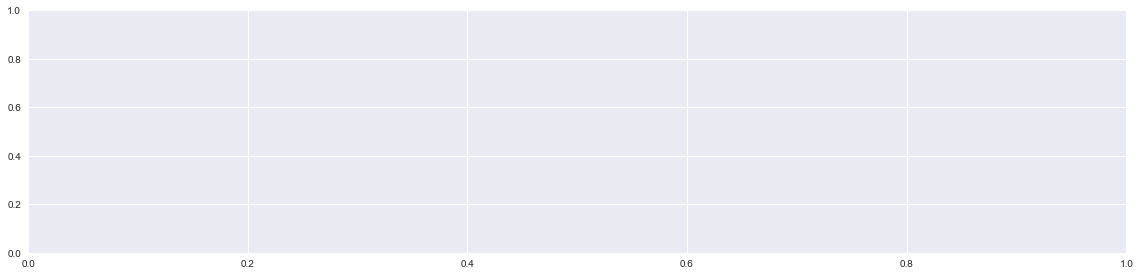

In [159]:
# a4_dims = (18,10)
# fig, ax = plt.subplots(figsize=a4_dims)
g = sns.FacetGrid(data=df[(df.ProsperRating.notnull())&(df.DebtToIncomeRatio <=1)], hue="ProsperRating",\
                 size=4, aspect=4)
g.map(plt.scatter.yscale('log'),"DebtToIncomeRatio", "LenderYield", )